# Set up

In [1]:
# Run this cell to set up your notebook
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import json

# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re

In [2]:
## Make sure you have set up tweepy if you are working locally.
# https://www.pythoncentral.io/introduction-to-tweepy-twitter-for-python/
# After set up, the following should run:
import tweepy

In [3]:
import json
key_file = 'keys.json'
# Loading your keys from keys.json (which you should have filled
# in in question 1):
with open(key_file) as f:
    keys = json.load(f)
# if you print or view the contents of keys be sure to delete the cell!

In [4]:
import tweepy
from tweepy import TweepError
import logging

try:
    auth = tweepy.OAuthHandler(keys["consumer_key"], keys["consumer_secret"])
    auth.set_access_token(keys["access_token"], keys["access_token_secret"])
    api = tweepy.API(auth)
    print("Your username is:", api.auth.get_username())
except TweepError as e:
    logging.warning("There was a Tweepy error. Double check your API keys and try again.")
    logging.warning(e)

Your username is: bigbroyaoyaoyao


In [5]:
from pathlib import Path
import json

ds_tweets_save_path = "data/RutgersU_recent_tweets.json"   # need to get this file

# Guarding against attempts to download the data multiple
# times:
if not Path(ds_tweets_save_path).is_file():
    # Getting as many recent tweets by @RutgersU as Twitter will let us have.
    # We use tweet_mode='extended' so that Twitter gives us full 280 character tweets.
    # This was a change introduced in September 2017.
    
    # The tweepy Cursor API actually returns "sophisticated" Status objects but we 
    # will use the basic Python dictionaries stored in the _json field. 
    example_tweets = [t._json for t in tweepy.Cursor(api.user_timeline, id="RutgersU", 
                                             tweet_mode='extended').items()]
    
    # Saving the tweets to a json file on disk for future analysis
    with open(ds_tweets_save_path, "w") as f:        
        json.dump(example_tweets, f)

# Re-loading the json file:
with open(ds_tweets_save_path, "r") as f:
    example_tweets = json.load(f)

In [6]:
# Looking at one tweet object, which has type Status: 
from pprint import pprint # ...to get a more easily-readable view.
pprint(example_tweets[2])

{'contributors': None,
 'coordinates': None,
 'created_at': 'Fri Mar 01 18:53:50 +0000 2019',
 'display_text_range': [0, 279],
 'entities': {'hashtags': [],
              'media': [{'display_url': 'pic.twitter.com/cnEOnFuyfV',
                         'expanded_url': 'https://twitter.com/RutgersU/status/1101556166411329538/photo/1',
                         'id': 1101553607386763266,
                         'id_str': '1101553607386763266',
                         'indices': [280, 303],
                         'media_url': 'http://pbs.twimg.com/media/D0mBK21WkAIzilu.jpg',
                         'media_url_https': 'https://pbs.twimg.com/media/D0mBK21WkAIzilu.jpg',
                         'sizes': {'large': {'h': 1253,
                                             'resize': 'fit',
                                             'w': 1080},
                                   'medium': {'h': 1200,
                                              'resize': 'fit',
                             

# Task 2.1
Re-factor the above code fragment into reusable snippets below. You should not need to make major modifications; this is mostly an exercise in understanding the above code block.

In [7]:
def load_keys(path):
    """Loads your Twitter authentication keys from a file on disk.
    
    Args:
        path (str): The path to your key file.  The file should
          be in JSON format and look like this (but filled in):
            {
                "consumer_key": "<your Consumer Key here>",
                "consumer_secret":  "<your Consumer Secret here>",
                "access_token": "<your Access Token here>",
                "access_token_secret": "<your Access Token Secret here>"
            }
    
    Returns:
        dict: A dictionary mapping key names (like "consumer_key") to
          key values."""
    
    if not Path(ds_tweets_save_path).is_file():
        print("Not file found")
        return {}
    else:
        with open(path) as f:
            return json.load(f)

In [8]:
def download_recent_tweets_by_user(user_account_name, keys):
    """Downloads tweets by one Twitter user.

    Args:
        user_account_name (str): The name of the Twitter account
          whose tweets will be downloaded.
        keys (dict): A Python dictionary with Twitter authentication
          keys (strings), like this (but filled in):
            {
                "consumer_key": "<your Consumer Key here>",
                "consumer_secret":  "<your Consumer Secret here>",
                "access_token": "<your Access Token here>",
                "access_token_secret": "<your Access Token Secret here>"
            }

    Returns:
        list: A list of Dictonary objects, each representing one tweet."""
    
    import tweepy
    from tweepy import TweepError
    import logging

    # Authenticating:
    try:
        auth = tweepy.OAuthHandler(keys["consumer_key"], keys["consumer_secret"])
        auth.set_access_token(keys["access_token"], keys["access_token_secret"])
        api = tweepy.API(auth)
        print("Succeed!!!")
        
        # Download the recent tweets from one user
        from pathlib import Path
        import json
        ds_tweets_save_path = "data/" +user_account_name + "_recent_tweets.json"
        if not Path(ds_tweets_save_path).is_file():
            example_tweets = [t._json for t in tweepy.Cursor(api.user_timeline, id=user_account_name, 
                                                     tweet_mode='extended').items()]
            with open(ds_tweets_save_path, "w") as f:        
                json.dump(example_tweets, f)
                
        with open(ds_tweets_save_path, "r") as f:
                return json.load(f)
        
    except TweepError as e:
        logging.warning("There was a Tweepy error. Double check your API keys and try again.")
        logging.warning(e)

In [9]:
def load_tweets(path):
    """Loads tweets that have previously been saved.
    
    Calling load_tweets(path) after save_tweets(tweets, path)
    will produce the same list of tweets.
    
    Args:
        path (str): The place where the tweets were be saved.

    Returns:
        list: A list of Dictionary objects, each representing one tweet."""
    if not Path(ds_tweets_save_path).is_file():
        print("Cannot find this file")
    else:
        with open(path, "r") as f:
            return json.load(f) 

In [10]:
def get_tweets_with_cache(user_account_name, keys_path):
    """Get recent tweets from one user, loading from a disk cache if available.
    
    The first time you call this function, it will download tweets by
    a user.  Subsequent calls will not re-download the tweets; instead
    they'll load the tweets from a save file in your local filesystem.
    All this is done using the functions you defined in the previous cell.
    This has benefits and drawbacks that often appear when you cache data:
    
    +: Using this function will prevent extraneous usage of the Twitter API.
    +: You will get your data much faster after the first time it's called.
    -: If you really want to re-download the tweets (say, to get newer ones,
       or because you screwed up something in the previous cell and your
       tweets aren't what you wanted), you'll have to find the save file
       (which will look like <something>_recent_tweets.pkl) and delete it.
    
    Args:
        user_account_name (str): The Twitter handle of a user, without the @.
        keys_path (str): The path to a JSON keys file in your filesystem.
    """
    
    return download_recent_tweets_by_user(user_account_name, keys_path)

## Testing the above methods
If everything was implemented correctly you should be able to obtain roughly the last 3000 tweets by the realdonaldtrump. (This may take a few minutes)


In [11]:
# When you are done, run this cell to load @realdonaldtrump's tweets.
# Note the function get_tweets_with_cache.  You may find it useful
# later.
key = load_keys(key_file)
trump_tweets = get_tweets_with_cache("realdonaldtrump", key)
print("Number of tweets downloaded:", len(trump_tweets))


# Load the old_tweet given
oldest_tweet = load_tweets("data/realdonaldtrump_old_tweets.json")
print("Number of tweets from the file given:", len(oldest_tweet))


Succeed!!!
Number of tweets downloaded: 3204
Number of tweets from the file given: 3214


# Task 2.1(alternate)

This alternate starting point is here for those of you who have trouble getting a Twitter developer account. You should only use this if Twitter has rejected your application or if they have gone silent on you for at least a day.

<font color='red' >The code below does not work because the URL is not valid</font>


In [12]:
# Download the dataset if cannot get the developer access

### USE "ctrl/cmd" + "/" to comment/uncomment the code below ###

# from utils import fetch_and_cache

# # if the download is not working, you can find the file in Canvas ==> files
# data_url = 'https://rutgers.instructure.com/courses/21255/files/4456420/download?download_frd=1'
# file_name = 'realdonaldtrump_old_tweets.json'
# dest_path = fetch_and_cache(data_url=data_url, file=file_name)
# print(dest_path)
# def load_tweets(path):

#     print(f'Located at {dest_path}')
#     with open(path, "rb") as f:
#         import json
#         return json.load(f)

# trump_tweets = load_tweets(dest_path)
# assert 2000 <= len(trump_tweets) <= 4000

# Task 2.2

Find the number of the month of the oldest tweet.

In [13]:
# Enter the number of the month of the oldest tweet (e.g. 1 for January)
oldest_month = 1

### BEGIN SOLUTION
import calendar
month_abbr = dict((k,v) for k,v in enumerate(calendar.month_abbr))

selected_month = month_abbr[oldest_month]

count = 0
for i in oldest_tweet:
    date = i['created_at'].split()
    if selected_month in date:
        count+=1
print("There are", count , "tweets in", calendar.month_name [list(calendar.month_abbr).index(selected_month)])

### END SOLUTION


There are 203 tweets in January


# PART 3 Twitter Source Analysis¶

In [14]:
# merge two json files
trump_tweets[0]
mylist = trump_tweets.copy()+(oldest_tweet).copy()
unique_list = list({v['id']:v for v in mylist}.values())
print("Total length before combining two lists：", len(trump_tweets)+len(oldest_tweet))
print("Total length after combining two lists：", len(unique_list))

all_tweets = unique_list


Total length before combining two lists： 6418
Total length after combining two lists： 4649


In [15]:
# rename all text to full_text
import os
import re

def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext

for i in all_tweets:
    if 'full_text' in i:
        i['text'] = i.pop('full_text')
    if i['source'].startswith('<'):
        i['source'] = cleanhtml(i['source'])
    if 'id' in i:
        i['ID'] = i.pop('id')
    if 'created_at' in i:
        i['time'] = i.pop('created_at')

# Create a temp file for storing all tweets
temp_file = 'data/all_tweets.json'

if os.path.exists(temp_file):
    os.remove(temp_file)   
with open(temp_file, 'w') as outfile:
    json.dump(all_tweets, outfile)

#ID --> 'id'
#time --> 'created_at'
#text --> 'full_text' or 'text'
#source --> 'source'
#retweet_count --> 'retweet_count'

# Load the first sheet of the JSON file into a data frame
df_trump = pd.read_json(open('data/all_tweets.json'))
df_trump = df_trump[['ID', 'time', 'text', 'source', 'retweet_count']]

df_trump['time'] = pd.to_datetime(df_trump['time'])
df_trump = df_trump.set_index('ID')

# df_trump['time'].dt.tz_localize(None)
df_trump['time'] = df_trump['time'].astype('datetime64[ns]')

In [16]:
# prview the cleaned dataframe
df_trump.head(-10)

,time,text,source,retweet_count
ID,,,,
1101880269106221058,2019-03-02 16:21:42,Thank you @marklevinshow!\nhttps://t.co/dwQR11genG,Twitter for iPhone,10849
1101870920795373569,2019-03-02 15:44:33,"@TeamCavuto It was a 3 day train ride to Vietnam, not 3 hours!",Twitter for iPhone,1601
1101857665037287425,2019-03-02 14:51:53,RT @realDonaldTrump: 93% Approval Rating in the Republican Party. 52% Approval Rating overall! Not bad considering I get the most unfair (B…,Twitter for iPhone,34498
1101857408001949696,2019-03-02 14:50:52,RT @realDonaldTrump: I hope our great Republican Senators don’t get led down the path of weak and ineffective Border Security. Without stro…,Twitter for iPhone,27707
1101856883634302976,2019-03-02 14:48:47,RT @realDonaldTrump: Since my election as President the Dow Jones is up 43% and the NASDAQ Composite almost 50%. Great news for your 401(k)…,Twitter for iPhone,24511
1101850483759742976,2019-03-02 14:23:21,"RT @dcexaminer: Pence says President Trump has ""no higher priority than the safety of the American people."" #CPAC2019 https://t.co/fmBGjTBC…",Twitter for iPhone,5386
1101850360396828672,2019-03-02 14:22:51,"RT @TeamTrump: Get your OFFICIAL campaign merchandise @ https://t.co/avCW7TGIn1 or, if you’re at @CPAC, check out our Official booth!” #Tea…",Twitter for iPhone,3333
1101839731761995776,2019-03-02 13:40:37,"Will be speaking at CPAC at 11:30 this morning. Record crowd, live broadcast. Enjoy!",Twitter for iPhone,11442
1101837499230498816,2019-03-02 13:31:45,"Very proud of perhaps the greatest golf course anywhere in the world. Also, furthers U.K. relationship! https://t.co/3xTzzJH6Iq",Twitter for iPhone,8089


In [17]:
# These assertion statements can be changed (if you'd like) as things can be different based on 
# if you are using old and new tweets or just the old tweets. 
# The goal here is to check the validity of the data

assert isinstance(df_trump, pd.DataFrame)
assert df_trump.shape[0] < 11000
assert df_trump.shape[1] >= 4
# assert 831846101179314177 in df_trump.index
# assert 753063644578144260 in df_trump.index
assert all(col in df_trump.columns for col in ['time', 'source', 'text', 'retweet_count'])
# If you fail these tests, you probably tried to use __dict__ or _json to read in the tweets
assert np.sometrue([('Twitter for iPhone' in s) for s in df_trump['source'].unique()])
assert df_trump['time'].dtype == np.dtype('<M8[ns]')
assert df_trump['text'].dtype == np.dtype('O')
assert df_trump['retweet_count'].dtype == np.dtype('int64')

In [18]:
df_trump['source'].unique()

array(['Twitter for iPhone', 'Twitter for iPad', 'Twitter Media Studio',
       'Media Studio', 'Twitter Web Client'], dtype=object)

# Task 3.3

Remove the HTML tags from the source field.

In [19]:
# Already did it when parsing the json data
df_trump['source'] = df_trump['source']

<font color='red' >The code below does not work because the old json file was not posted</font>

In [20]:
from datetime import datetime
ELEC_DATE = datetime(2016, 11, 8)
INAUG_DATE = datetime(2017, 1, 20)
# assert set(df_trump[(df_trump['time'] > ELEC_DATE) & (df_trump['time'] < INAUG_DATE) ]['source'].unique()) == set(['Twitter Ads',
#  'Twitter Web Client',
#  'Twitter for Android',
#  'Twitter for iPhone'])

assert set(df_trump[(df_trump['time'] > ELEC_DATE) ]['source'].unique()) == set(['Twitter for iPhone', 'Twitter for iPad', 'Twitter Media Studio',
       'Media Studio', 'Twitter Web Client'])

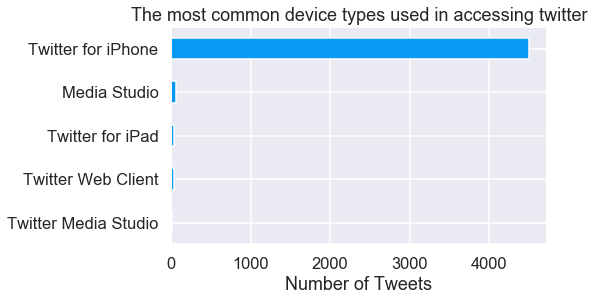

In [35]:
plt.figure()
df_trump['source'].value_counts(ascending=True).plot(kind="barh", color='xkcd:azure')
plt.xlabel("Number of Tweets")
plt.title('The most common device types used in accessing twitter')
plt.show()

# Task 3.4

Is there a difference between his Tweet behavior across these devices? We will attempt to answer this question in our subsequent analysis.

First, we'll take a look at whether Trump's tweets from an Android come at different times than his tweets from an iPhone. Note that Twitter gives us his tweets in the UTC timezone (notice the +0000 in the first few tweets)


In [54]:
df_trump['est_time'] = (
    df_trump['time'].dt.tz_localize("UTC") # Set initial timezone to UTC
                 .dt.tz_convert("EST") # Convert to Eastern Time
)
df_trump.head()

,time,text,source,retweet_count,est_time,hour
ID,,,,,,
1101880269106221058,2019-03-02 16:21:42,Thank you @marklevinshow!\nhttps://t.co/dwQR11genG,Twitter for iPhone,10849,2019-03-02 11:21:42-05:00,11.355833
1101870920795373569,2019-03-02 15:44:33,"@TeamCavuto It was a 3 day train ride to Vietnam, not 3 hours!",Twitter for iPhone,1601,2019-03-02 10:44:33-05:00,10.745556
1101857665037287425,2019-03-02 14:51:53,RT @realDonaldTrump: 93% Approval Rating in the Republican Party. 52% Approval Rating overall! Not bad considering I get the most unfair (B…,Twitter for iPhone,34498,2019-03-02 09:51:53-05:00,9.864167
1101857408001949696,2019-03-02 14:50:52,RT @realDonaldTrump: I hope our great Republican Senators don’t get led down the path of weak and ineffective Border Security. Without stro…,Twitter for iPhone,27707,2019-03-02 09:50:52-05:00,9.847222
1101856883634302976,2019-03-02 14:48:47,RT @realDonaldTrump: Since my election as President the Dow Jones is up 43% and the NASDAQ Composite almost 50%. Great news for your 401(k)…,Twitter for iPhone,24511,2019-03-02 09:48:47-05:00,9.813333


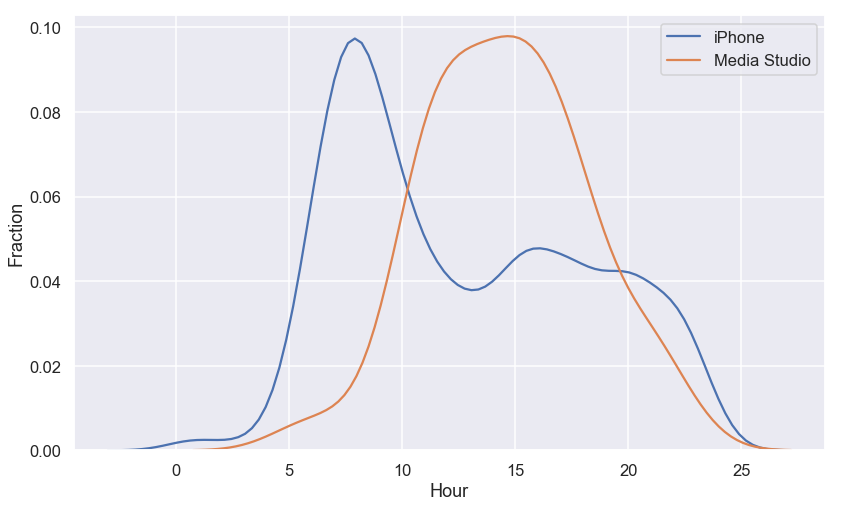

In [95]:
df_trump['hour'] = df_trump.est_time.apply(lambda x: x.hour + x.minute/60 + x.minute/3600)# make a bar plot here

# make a bar plot here

# bar plot is useless here(personal note)

### BEGIN SOLUTION
# plt.figure()
# df_trump['hour'].value_counts().plot(kind="bar", color='xkcd:azure')
# plt.xlabel("Hours")
# plt.show()
### END SOLUTION

plt.figure(figsize=(12,8))
df_trump_iphone = df_trump[(df_trump['source'] == 'Twitter for iPhone')]['hour']

df_trump_media = df_trump[(df_trump['source'] == 'Media Studio')]['hour']
ax = sns.distplot(df_trump_iphone, hist=False, label = 'iPhone')
ax1 = sns.distplot(df_trump_media, hist=False, label = 'Media Studio')
ax.set_xlabel("Hour")
ax.set_ylabel("Fraction")
plt.show()

<font color='red' >The code below does not work because the old json file was not posted. Bar plot is useless too.</font>

In [52]:


# todo: key does not exist, maybe because missing the olde tweet file

# assert np.isclose(df_trump.loc[690171032150237184]['hour'], 8.93639)